## Projeto Web Scraping para Analisar Anúncios de Vagas de Ciência de Dados

#### O Web Scraping ou (Raspagem Web) é uma técnica para coleta e mineração de dados da Web, o objetivo principal é estruturar os dados para colher insights importantes.

#### Aplicando Processamento de Linguagem Natural conseguimos dissecar o texto para adquirir informações úteis.

##### É de fundamental importância verificar os termos de uso do(s) site(s) alvo, evitando violação de regras que causem impacto negativo.

In [1]:
# Verificando versão do Python, neste projeto utilizaremos a linguagem de programação mencionada.
from platform import python_version
print("Neste laboratório estamos utilizando a versão do Python:", python_version())

Neste laboratório estamos utilizando a versão do Python: 3.7.6


#### Utilizaremos o pip para instalar os pacotes necessários para o projeto. O pip é um gerenciador de pacotes Python.

#### Selenium é ferramenta de automatização que permite realizar testes em ambientes de aplicações reais.

In [2]:
# Comando pip para instalação do selenium.
!pip install -q selenium

#### Para este projeto é necessário a utilização de alguns pacotes para testes, cálculos, manipulação de dados, mineração de texto e confecção de gráficos.

In [3]:
# Importando bibliotecas.
import bs4
import selenium
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from collections import Counter

#### Utilizaremos o pacote watermark para verificar as versões dos pacotes instalados.

In [4]:
# Instalação e uso do pacote watermark.
!pip install -q -U watermark

%load_ext watermark
%watermark --iversions

bs4                4.8.2
selenium           3.141.0
selenium.webdriver 3.14.1
pandas             1.0.1
numpy              1.18.1
seaborn            0.10.0



#### Utilizaremos o ChromeDriver como WebDriver desse projeto, é uma ferramenta open source para testes automatizados em páginas web.

https://chromedriver.chromium.org/

###### Note que será iniciada uma janela do navegador, não feche até a extração dos dados.

In [5]:
# Criando o driver de conexão.
cdriver = webdriver.Chrome("./chromedriver")
cdriver.implicitly_wait(10) # 10 segundos

#### Utilizaremos neste projeto as vagas anunciadas no GeekHunter, uma plataforma voltada para contratações de profissionais de desenvolvimento e correlações.
https://www.geekhunter.com.br

In [6]:
# Abrindo conexão com a página alvo e fazendo a busca.
cdriver.get("https://www.geekhunter.com.br/vagas-data-science")

In [7]:
# Gravando as informações do scraping em uma variável.
geekhunter = cdriver.find_elements_by_class_name("job")

#### Utilizaremos o pacote pandas para manipulação das informações, estruturamos os dados em um DataFrame.
#### Definiremos o DataFrame vazio para receber os dados extraídos de um loop for.

In [8]:
# Criando dataframe para receber os dados
df = pd.DataFrame(columns = ["Titulo", "Local", "Tipo_Trabalho", "Salario", "Detalhes"])

df

,Titulo,Local,Tipo_Trabalho,Salario,Detalhes


In [9]:
# Loop para extrair valores do geekhunter
for gvaga in geekhunter:
    
    # Primeiro coletamos o elemento HTML interno
    result_html = gvaga.get_attribute('innerHTML')
    
    # Fazemos então o parser do código HTML
    soup = BeautifulSoup(result_html, 'html.parser')
    
    # Buscando título da vaga
    try:
        titulo = soup.find("a").text
    except:
        "Não informado"
    
    # Buscando local da vaga
    try:
        local = soup.find(class_ = "city").text.replace('place', '') \
                                      .replace('\n', '') \
                                      .replace('  ', '') \
                                      .replace('Remoto', '') \
                                      .strip()
    except:
        "Não informado"
    
    # Buscando tipo do trabalho (Presencial/Remoto)
    try:
        tipo = soup.find(class_ = "badge badge-secondary badge-remote").text
    except:
        tipo = 'Presencial'
        
    # Buscando salário
    try:
        salario = soup.find(class_ = "job-salary").text.replace('\n', '')\
                                                  .replace('  ', '')\
                                                  .replace('R$', '')
    except:
        salario = "Não informado"
        
    # Buscando descrição da vaga
    
    try:
        descricao = soup.find(class_="description").text.replace('\n', '').strip()
    except:
        "Exigência mínima para a vaga"

    
    # Gravando informações no DataFrame
    df = df.append({"Titulo": titulo,
                    "Local": local,
                    "Tipo_Trabalho": tipo,
                    "Salario": salario,
                    "Detalhes": descricao },
                    ignore_index = True)

#### Depois de feita a extração dos dados, verificaremos como eles estão estruturados.

In [10]:
# Visualizando as informações das 5 primeiras linhas do DataFrame.
df.head(5)

,Titulo,Local,Tipo_Trabalho,Salario,Detalhes
0,Engenheiro(a) de Dados SQL pleno,Barueri - SP,Presencial,Não informado,"Ampla experiência em Data Science, Processamen..."
1,Engenheiro(a) de Dados Python Sênior,São Paulo - SP,Remoto,"10.000,00 - 10.500,00",Os conhecimentos necessários para essa posição...
2,Cientista de Dados Python,São Paulo - SP,Remoto,"9.000,00 - 10.000,00",Conhecimentos necessários para essa posição:Li...
3,Analista de BI ETL Sênior,São Paulo - SP,Presencial,Não informado,Estamos buscando um Analista de Business Intel...
4,Analista de Dados SQL,Porto Alegre - RS,Remoto,"3.000,00 - 7.500,00",DBA SQL Pleno Conhecimentos comprovados em SQL...


### Começaremos a discutir o (Storytelling) do projeto contando histórias sobre os dados, analisando vagas por Locais, Tipo de Trabalho...
#### Facilitaremos o entendimento do usuário final utilizando a visualização de dados por meio de gráficos.

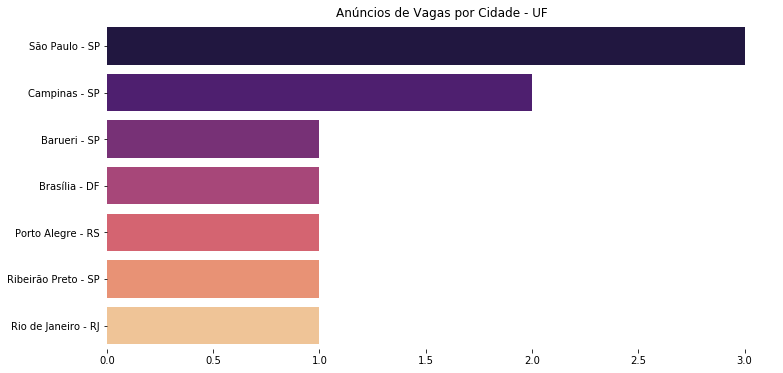

In [11]:
# Analisando locais onde as vagas estão sendo ofertadas.
local_analytics = df.groupby('Local').size().to_frame('Qtd').sort_values('Qtd', ascending = False).reset_index()

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(12,6))

# Plotando gráfico.
sns.barplot(x="Qtd", y="Local", data=local_analytics, palette="magma")

ax.set(title="Anúncios de Vagas por Cidade - UF", ylabel ="", xlabel = "")
sns.despine(left=True, bottom=True)

#### Por meio da amostra deste projeto, conseguimos extrair a informação que o estado de São Paulo tem predominância na oferta de vagas para Data Science.

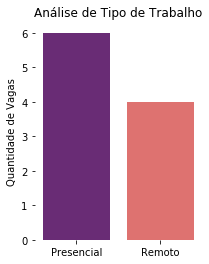

In [12]:
# Analisando tipo de trabalho (Presencial/Remoto).
tipo_analytics = df.groupby("Tipo_Trabalho").size().to_frame("Qtd").sort_values("Qtd", ascending = False).reset_index()

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(3,4))

# Plotando gráfico.
sns.barplot(x="Tipo_Trabalho", y="Qtd", data=tipo_analytics, palette="magma")

ax.set(title="Análise de Tipo de Trabalho", ylabel ="Quantidade de Vagas", xlabel = "")
sns.despine(left=True, bottom=True)

#### Analisando o gráfico de tipo de trabalho conseguimos observar que o trabalho remoto está ganhando o seu espaço, quase igualando com a quantidade de vagas presenciais. A pandemia do Covid-19 foi uma grande propulsora para este avanço, sendo necessário respeitar o distanciamento social para evitar colapso na saúde.

Text(0.5, 0.98, 'Tipo de Trabalho por Local')

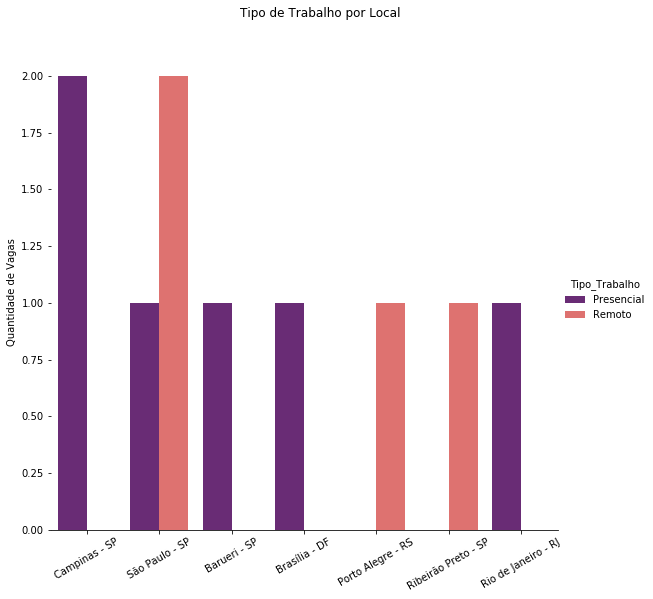

In [13]:
# Análisando tipo de trabalho por local.
tipo_local_analytics = df.groupby(['Local', 'Tipo_Trabalho'])['Tipo_Trabalho']\
                       .size().to_frame("Qtd").sort_values("Qtd", ascending = False)\
                       .reset_index()

g = sns.catplot(x='Local', y='Qtd', hue='Tipo_Trabalho', data=tipo_local_analytics, 
                height=8, kind='bar', palette = "magma")
g.despine(left=True)
g.set_ylabels("Quantidade de Vagas")
g.set_xlabels("")
plt.subplots_adjust(top=0.9)
g.set_xticklabels(rotation=30)
g.fig.suptitle('Tipo de Trabalho por Local')

#### Com base na análise do gráfico "Tipo de Trabalho por Local" podemos concluir que nos estados de São Paulo e Rio Grande do Sul  a demanda pelo trabalho remoto está aumentando.

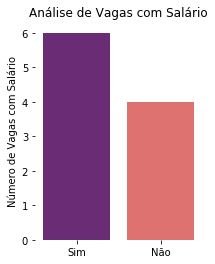

In [14]:
# Analisando a quantidade de vagas que estão divulgando salário.

# Criando DataFrame para armazenar informações da divulgação de salário.
df_salario = pd.DataFrame(columns = ["Divulga", "Quantidade"])

# Estrutura for para percorrer a lista de vagas e extrair as informações de salários.
for salario in df['Salario']:
    
    if(salario == 'Não informado'):
        df_salario = df_salario.append({"Divulga": "Não", "Quantidade": 1}, ignore_index = True)
    else:
        df_salario = df_salario.append({"Divulga": "Sim", "Quantidade": 1}, ignore_index = True)

# Agrupando informações de salários.
salario_analytics = df_salario.groupby(['Divulga']).size().to_frame("Quantidade")\
                                                   .sort_values("Quantidade", ascending = False)\
                                                   .reset_index()
                                                                

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(3,4))

# Plotando gráfico.
sns.barplot(x="Divulga", y="Quantidade", data=salario_analytics, palette="magma")

ax.set(title="Análise de Vagas com Salário", ylabel ="Número de Vagas com Salário", xlabel = "")
sns.despine(left=True, bottom=True)

#### Podemos concluir que a maioria das vagas divulgam o salário, sendo este um grande atrativo para as empresas chamarem a atenção dos candidatos.

### Trabalharemos agora com a mineração de texto, sendo essa uma técnica muito importante para se obter informações de grande valor em strings não estruturadas.

### O Processamento de Linguagem Natural é a tecnologia utilizada para ajudar os dispositivos na compreensão da linguagem humana, tornando capaz de obter informações relevantes para soluções de problemas.

### O Python dispõe de uma grande ferramenta para PLN, o NLTK é um conjunto de bibliotecas e ferramentas para compreensão da linguagem natural.

https://www.nltk.org/

In [15]:
# Importando o NLTK.
# Será aberta uma janela do navegador para selecionar os pacotes que serão instalados, 
# para este projeto é recomendado instalar todos da lista para que as bibliotecas sejam instaladas sem pendência.
import nltk
nltk.download()
from nltk import word_tokenize
from nltk.corpus import stopwords

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


#### Definindo a lista das StopWords, são palavras que não tem relevância para análise, como artigos, espaços em branco, símbolos...

In [16]:
# Definindo lista de stopwords.

# Português - pt.
stopwords_pt = stopwords.words('portuguese')

# Inglês - en.
stopwords_en = stopwords.words('english')

#### Para facilitar nossa análise, colocaremos todo o texto em minúsculo e removeremos as StopWords.

In [17]:
# Definindo função para tratamento dos detalhes das vagas.
def func_limp_desc(descricao):
    descricao = word_tokenize(descricao)
    descricao = [word.lower() for word in descricao if word.isalpha() and len(word) > 3]
    descricao = [word for word in descricao if word not in stopwords_pt]
    descricao = [word for word in descricao if word not in stopwords_en]
    return descricao

#### Analisando as cinco primeiras linhas antes de aplicar a função de tratamento.

In [18]:
df['Detalhes'].head(5)

0    Ampla experiência em Data Science, Processamen...
1    Os conhecimentos necessários para essa posição...
2    Conhecimentos necessários para essa posição:Li...
3    Estamos buscando um Analista de Business Intel...
4    DBA SQL Pleno Conhecimentos comprovados em SQL...
Name: Detalhes, dtype: object

#### Aplicando a função de tratamento para todas as linhas do DataFrame.

In [19]:
descricoes = df['Detalhes'].apply(func_limp_desc)

#### Observando as cinco primeiras linhas depois de tratar os dados com a função.

In [20]:
descricoes.head(5)

0    [ampla, experiência, data, science, processame...
1    [conhecimentos, necessários, posição, lideranç...
2    [conhecimentos, necessários, posição, lideranç...
3    [buscando, analista, business, intelligence, n...
4    [pleno, conhecimentos, comprovados, server, ee...
Name: Detalhes, dtype: object

#### Transformando as descrições das vagas em uma única string, possibilitando criar uma nuvem de palavras com o objetivo de colher as principais exigências nas vagas, como as ferramentas, idioma, escolaridade...

In [21]:
# Utilizando To_String().
desc_str = descricoes.to_string()

#### Utilizaremos o pacote wordcloud, podendo ser instalado via pip.
https://pypi.org/project/wordcloud

In [22]:
# Instalando o pacote WordCloud.
!pip install -q wordcloud
from wordcloud import WordCloud

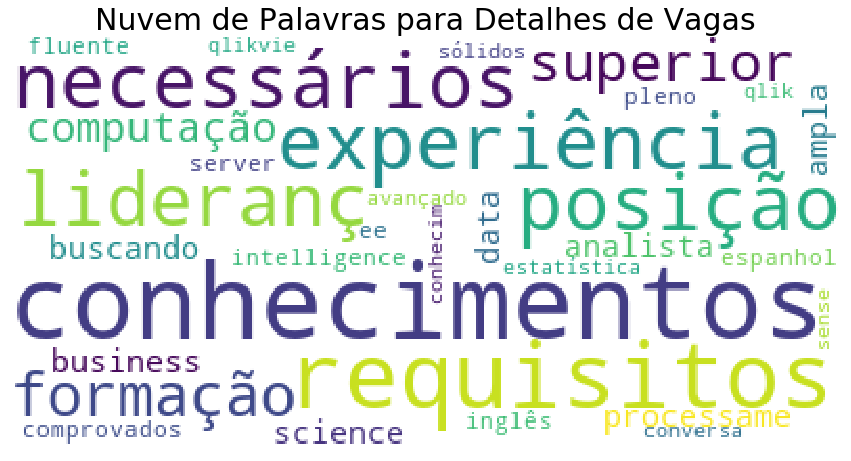

In [23]:
# Criando uma nuvem de palavras com os detalhes das vagas.
plt.figure(figsize = (15, 15))
wordcloud = WordCloud(background_color = 'white',
                      max_words = 1000,
                      max_font_size = 120).generate(desc_str)

plt.imshow(wordcloud)
plt.title("Nuvem de Palavras para Detalhes de Vagas", fontsize = 30)
plt.axis("off")
plt.show()

#### Podemos concluir que as empresas estão procurando candidatos com experiência, caso você seja iniciante e ainda não tenha trabalhado em projetos reais, é importante criar projetos por conta própria para montar o seu portfólio.
#### Concluímos também que as empresas estão em busca de líderes, sendo esses peças fundamentais para o sucesso do negócio.
#### Uma atenção especial ao idioma inglês e espanhol e conhecimentos sólidos em estatística, sendo essa de fundamental importância para Ciência de Dados.





### Nota do autor:

##### Sinta-se à vontade para usar este projeto como laboratório, estude, coloque em prática todo conhecimento adquirido e compartilhe conhecimento...
##### Estarei à disposição, Glauco Júnior Carvalho.
##### http://linkedin.com/in/glaucojrcarvalho
##### https://gitlab.com/glaucojrcarvalho